<a href="https://colab.research.google.com/github/clockingoffbye/PCVK_Ganjil_2025/blob/main/Modul1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from skimage import io, transform
from PIL import Image
import matplotlib.pyplot as plt


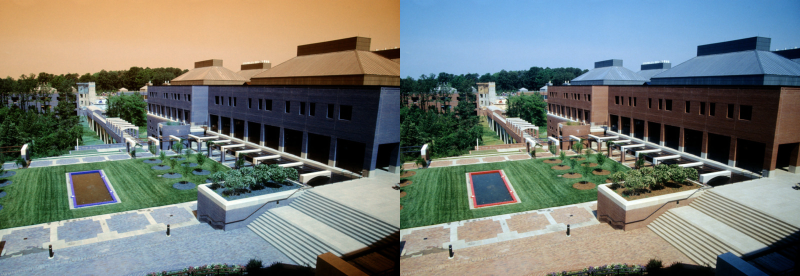

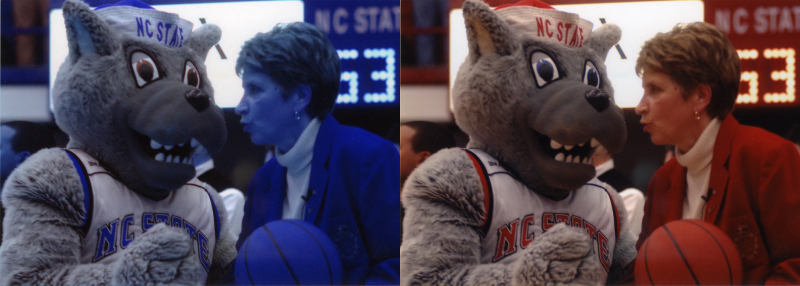

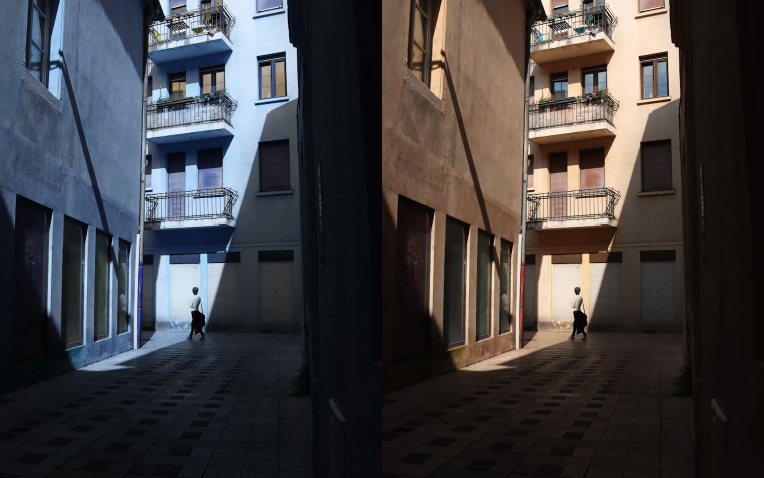

In [ ]:
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://images.unsplash.com/photo-1754136362561-fd8b431c78e4?q=80&w=765&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"]

for url in urls:
    img = io.imread(url)
    img_resized = cv2.resize(img, None, fx=0.5, fy=0.5)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    final_frame = cv2.hconcat([img_resized, img_rgb])
    cv2_imshow(final_frame)
    print('\n')



Resolusi image 2: tinggi x lebar = 286 x 400


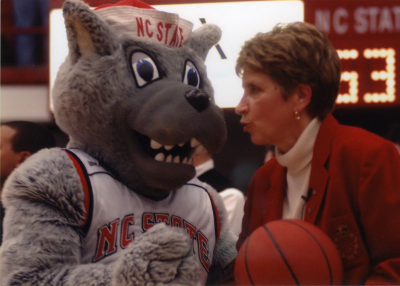

In [ ]:
# Ambil image ke-2 (index 1)
img2 = images_rgb[1]

tinggi = img2.shape[0]
lebar = img2.shape[1]
print("Resolusi image 2: tinggi x lebar =", tinggi, "x", lebar)

cv2_imshow(img2)


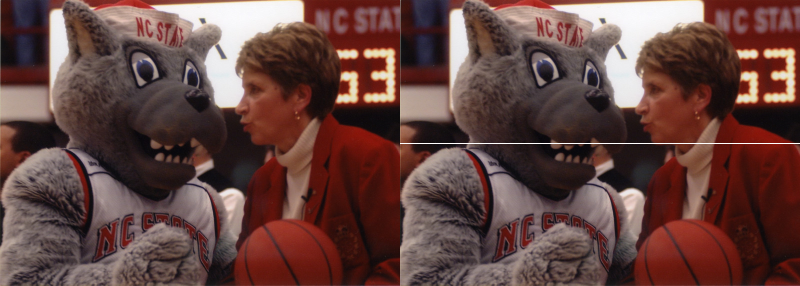

In [ ]:
# membuat garis horizontal di tengah image ke-2

img2 = images_rgb[1]

image_2 = img2.copy()
image_3 = img2.copy()

tinggi, lebar = img2.shape[:2]

for y in range(lebar):
    image_3[tinggi // 2, y] = [255, 255, 255]

final_frame = cv2.hconcat([image_2, image_3])
cv2_imshow(final_frame)


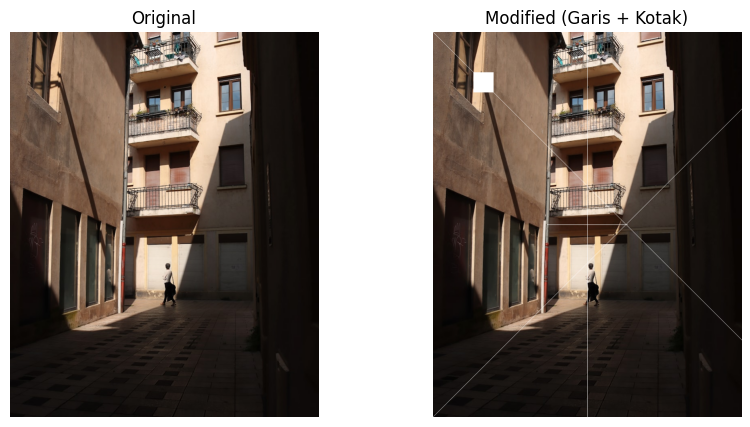

In [ ]:
# Tugas
# Baca citra dari URL (contoh dari modul)
url = "https://images.unsplash.com/photo-1754136362561-fd8b431c78e4?q=80&w=765&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
img = io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img_mod = img.copy()

height, width = img_mod.shape[:2]

# 2. Garis vertikal putih di tengah
for y in range(height):
    img_mod[y, int(width/2)] = [255, 255, 255]

# Garis diagonal menyilang (dari kiri atas ke kanan bawah)
for i in range(min(height, width)):
    img_mod[i, i] = [255, 255, 255]

# Garis diagonal menyilang (dari kanan atas ke kiri bawah)
for i in range(min(height, width)):
    img_mod[height - 1 - i, i] = [255, 255, 255]

# 3. Garis horizontal putih di tengah, panjang tertentu (misal 200 pixel dari tengah kiri)
start_x = int(width/2 - 100)
end_x = int(width/2 + 100)
mid_y = int(height/2)
for x in range(start_x, end_x):
    img_mod[mid_y, x] = [255, 255, 255]

# 4. Kotak putih random
box_size = 50
start_row, start_col = 100, 100
img_mod[start_row:start_row+box_size, start_col:start_col+box_size] = [255, 255, 255]

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB))
plt.title("Modified (Garis + Kotak)")
plt.axis('off')
plt.show()